# Checking results in summary.json files generated by nnUNet

In [1]:
# imports
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to predicted data
data_path = '../../../nnUNet_data/nnUNet_raw/Dataset361_Menisci/'

# list stuff at this path
os.listdir(data_path)

['ResEnc_3d_bs4_predsTs',
 'clip_rescale_predsTs',
 'predict_ResEnc_3d_bs4.sh.o7206482',
 'predict_ResEnc_3d_bs4.sh.e7206482',
 'labelsTs',
 'zscore_predsTs',
 'labelsTr',
 'predict_3d_fullres_clip_rescale.sh',
 'dataset.json',
 'imagesTr',
 'predict_ResEnc_3d_bs4.sh',
 'predict_3d_fullres.sh',
 'imagesTs']

In [3]:
# function to take json file and return array of dice scores
def get_dice_scores(json_file):
    with open(json_file) as f:
        data = json.load(f)

    # Extract Dice scores from "metric_per_case"
    dice_scores = [
        case["metrics"]["1"]["Dice"] for case in data["metric_per_case"]
    ]

    return dice_scores

In [9]:
# Get dice scores from zscore_predsTs folder
json_path = os.path.join(data_path, 'zscore_predsTs', 'summary.json')
zscore_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Zscore Results")
print(f"Mean Dice score: {np.mean(zscore_dice_scores):.4f}")
print(f"Std Dice score: {np.std(zscore_dice_scores):.4f}")

Zscore Results
Mean Dice score: 0.8923
Std Dice score: 0.0271


In [10]:
# Get dice scores from clip_rescale_predsTs folder
json_path = os.path.join(data_path, 'clip_rescale_predsTs', 'summary.json')
clip_rescale_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("Clip Rescale Results")
print(f"Mean Dice score: {np.mean(clip_rescale_dice_scores):.4f}")
print(f"Std Dice score: {np.std(clip_rescale_dice_scores):.4f}")

Clip Rescale Results
Mean Dice score: 0.8909
Std Dice score: 0.0273


In [11]:
# Get dice scores from ResEnc_3d_bs4_predsTs folder
json_path = os.path.join(data_path, 'ResEnc_3d_bs4_predsTs', 'summary.json')
resenc_dice_scores = get_dice_scores(json_path)

# print dice score mean and std
print("ResEnc Results")
print(f"Mean Dice score: {np.mean(resenc_dice_scores):.4f}")
print(f"Std Dice score: {np.std(resenc_dice_scores):.4f}")

ResEnc Results
Mean Dice score: 0.8929
Std Dice score: 0.0267


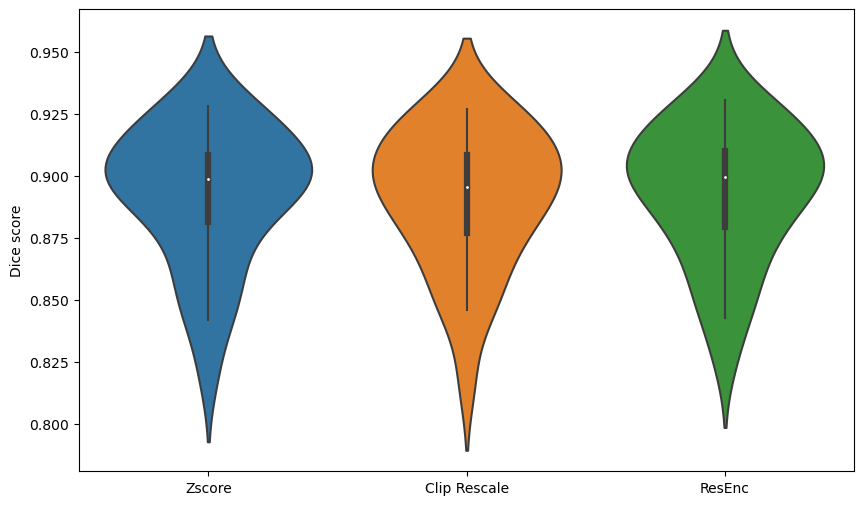

In [8]:
# plot a violin plot of the three sets of dice scores
df = pd.DataFrame({
    "Zscore": zscore_dice_scores,
    "Clip Rescale": clip_rescale_dice_scores,
    "ResEnc": resenc_dice_scores
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.ylabel("Dice score")
plt.show()